In [1]:
import numpy as np
import cv2
from scipy.ndimage import maximum_filter, minimum_filter
from pylab import *
from scipy import ndimage, misc
from skimage.restoration import inpaint
from scipy import stats
from PIL import Image, ImageFilter
from skimage import io
from skimage.filters import try_all_threshold
from skimage.color import rgb2gray
from scipy.signal.signaltools import wiener
import math
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt

# A

<Figure size 432x288 with 0 Axes>

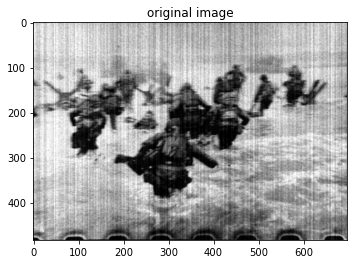

<Figure size 432x288 with 0 Axes>

In [2]:
img = cv2.imread(r'C:\Users\fateme\Desktop\inputs\P1\the_magnificent_eleven_1.png')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title("original image")
plt.figure()

In [3]:
def guidedfilter(p, I, r, e, same_shape=True):

    if not(same_shape):
        I = np.repeat(I[:, :, np.newaxis], 3, axis=2)
    r = 2 * r - 1
    mean_I = cv2.blur(I,(r,r))
    mean_p = cv2.blur(p,(r,r))
    corr_I = cv2.blur(np.multiply(I,I),(r,r))
    corr_p = cv2.blur(np.multiply(I,p),(r,r))
    var_I = corr_I - np.multiply(mean_I,mean_I)
    cov_Ip = corr_p - np.multiply(mean_I,mean_p)
    a = np.divide(cov_Ip,(var_I+e))
    b = mean_p - np.multiply(a, mean_I)
    mean_a = cv2.blur(a,(r,r))
    mean_b = cv2.blur(b,(r,r))
    q = np.multiply(mean_a,I) + mean_b
    q = np.clip(q, 0, 1)
    return q

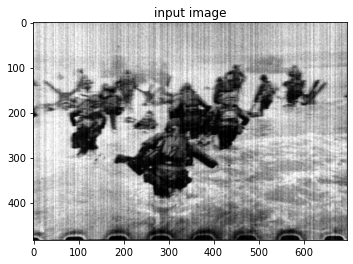

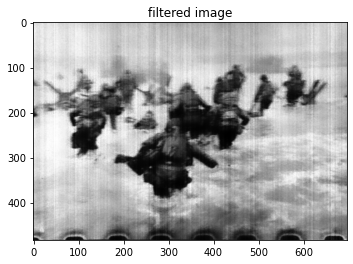

In [4]:
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)/255
plt.imshow(img1, cmap='gray')
plt.title('input image')
plt.show()
guided_img = guidedfilter(img1,img1,8,0.01)
plt.imshow(guided_img, cmap='gray')
plt.title('filtered image')
plt.show()

# B

<Figure size 432x288 with 0 Axes>

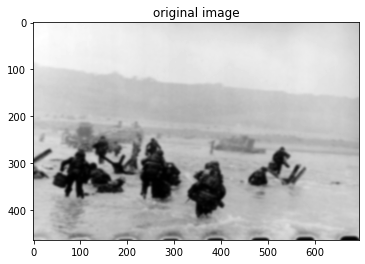

<Figure size 432x288 with 0 Axes>

In [5]:
img = cv2.imread(r'C:\Users\fateme\Desktop\inputs\P1\the_magnificent_eleven_2.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img,'gray')
plt.title("original image")
plt.figure()

Text(0.5, 1.0, 'filtered image')

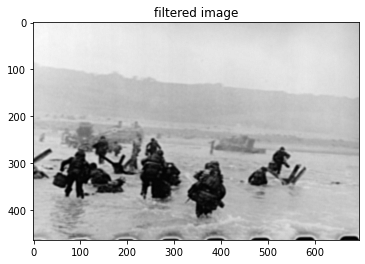

In [6]:
image = cv2.imread(r'C:\Users\fateme\Desktop\inputs\P1\the_magnificent_eleven_2.png')
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv2.filter2D(image, -1, sharpen_kernel)

cv2.imshow('sharpen', sharpen)
plt.imshow(sharpen,'gray')
plt.title('filtered image')

# C

<Figure size 432x288 with 0 Axes>

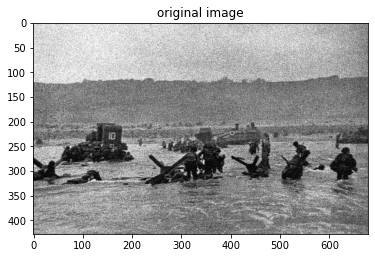

<Figure size 432x288 with 0 Axes>

In [7]:
img = cv2.imread(r'C:\Users\fateme\Desktop\inputs\P1\the_magnificent_eleven_3.png')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title("original image")
plt.figure()

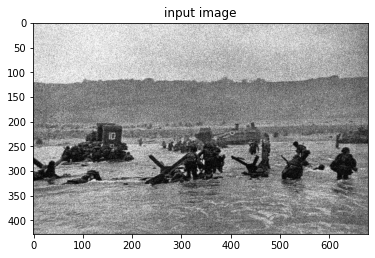

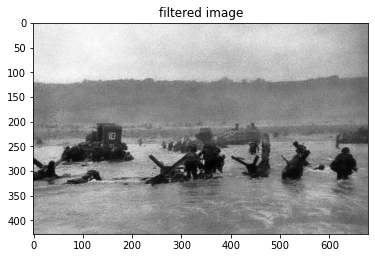

In [8]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)/255
plt.imshow(img, cmap='gray')
plt.title('input image')
plt.show()
guided_img = guidedfilter(img,img,8,0.02)
plt.imshow(guided_img, cmap='gray')
plt.title('filtered image')
plt.show()

# D

<Figure size 432x288 with 0 Axes>

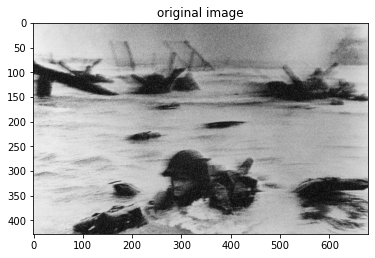

<Figure size 432x288 with 0 Axes>

In [84]:
img = cv2.imread(r'C:\Users\fateme\Desktop\inputs\P1\the_magnificent_eleven_4.png')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title("original image")
plt.figure()

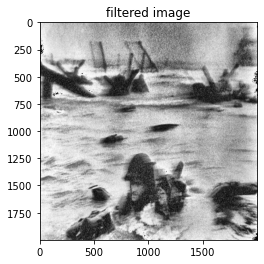

In [85]:
import cv2
import numpy as np
 
image = cv2.imread(r'C:\Users\fateme\Desktop\inputs\P1\the_magnificent_eleven_4.png')
image = cv2.resize(image, (2000, 2000))
image_bw = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
 
clahe = cv2.createCLAHE(clipLimit = 2)
final_img = clahe.apply(image_bw) + 10
 
_, ordinary_img = cv2.threshold(image_bw, 155, 255, cv2.THRESH_BINARY)
plt.title('filtered image')
plt.imshow(final_img,cmap="gray")

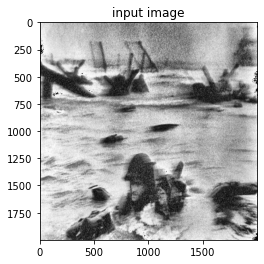

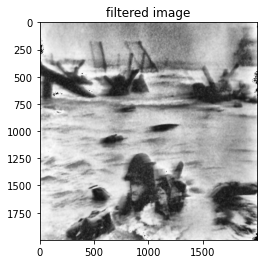

In [86]:
img1 = final_img/255
plt.imshow(img1, cmap='gray')
plt.title('input image')
plt.show()
guided_img = guidedfilter(img1,img1,6,0.02)
plt.imshow(guided_img, cmap='gray')
plt.title('filtered image')
plt.show()

# E

<Figure size 432x288 with 0 Axes>

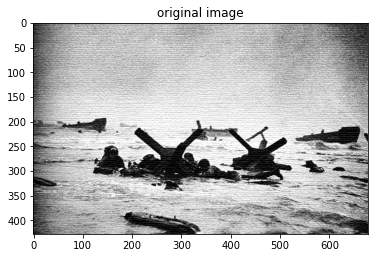

<Figure size 432x288 with 0 Axes>

In [87]:
img = cv2.imread(r'C:\Users\fateme\Desktop\inputs\P1\the_magnificent_eleven_5.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap="gray")
plt.title("original image")
plt.figure()

In [88]:
def img_dft(img, plot=False):
    f = np.fft.fft2(img)
    f_shift = np.fft.fftshift(f)
    f_abs = np.abs(f_shift) + 1
    f_bounded = 20 * np.log10(f_abs)
    f_img = 255 * f_bounded / np.max(f_bounded)
    f_img = f_img.astype(np.uint8)
    if plot:
        plt.imshow(f_img, cmap="gray")
        plt.title("Image spectrum")
        plt.show()
    return f_shift,f_img

def img_idft(f_shift, plot=True):
    f = np.fft.fftshift(f_shift)
    inv_img = np.fft.ifft2(f)
    inv_img = np.abs(inv_img)
    inv_img -= np.min(inv_img)
    inv_img = inv_img / np.max(inv_img) * 255
    inv_img = inv_img.astype(np.uint8)
    if plot:
        plt.imshow(inv_img, cmap="gray")
        plt.show()
    return inv_img

def gaussian_kernel(dimension_x, dimension_y, sigma_x, sigma_y):
    x = cv2.getGaussianKernel(dimension_x, sigma_x)
    y = cv2.getGaussianKernel(dimension_y, sigma_y)
    kernel = x.dot(y.T)
    kernel = (kernel - kernel.min()) / (kernel.max() - kernel.min())
    return kernel

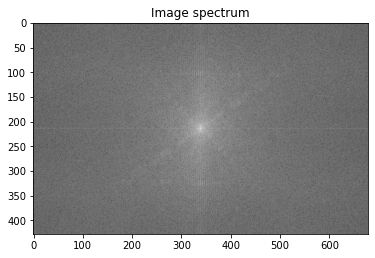

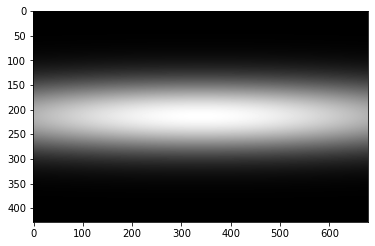

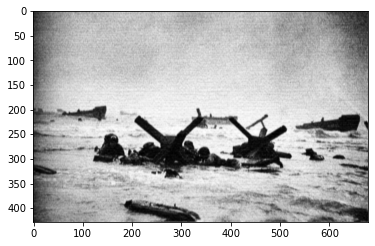

array([[29, 39, 38, ..., 54, 73, 56],
       [37, 56, 50, ..., 58, 66, 55],
       [43, 67, 58, ..., 66, 60, 52],
       ...,
       [20, 19, 20, ..., 15, 29, 21],
       [23, 23, 25, ..., 32, 56, 39],
       [25, 29, 29, ..., 47, 73, 52]], dtype=uint8)

In [89]:
f_shift, f_img = img_dft(img, plot=True)
h = gaussian_kernel(f_shift.shape[0], f_shift.shape[1], 50, 400)
h = (h - h.min()) / (h.max() - h.min())
plt.imshow(h, cmap="gray")
plt.show()

f_filtered = h * f_shift
img_idft(f_filtered)

# F

<Figure size 432x288 with 0 Axes>

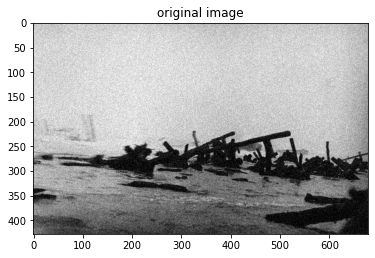

<Figure size 432x288 with 0 Axes>

In [90]:
img = cv2.imread(r'C:\Users\fateme\Desktop\inputs\P1\the_magnificent_eleven_6.png')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title("original image")
plt.figure()

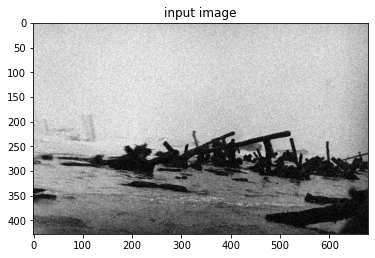

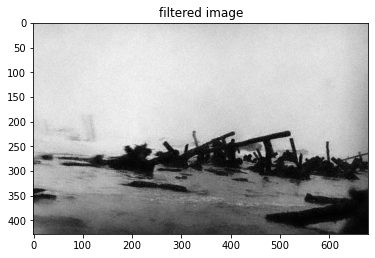

In [91]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)/255
plt.imshow(img, cmap='gray')
plt.title('input image')
plt.show()
guided_img = guidedfilter(img,img,8,0.01)
plt.imshow(guided_img, cmap='gray')
plt.title('filtered image')
plt.show()